<a href="https://colab.research.google.com/github/Barttje/summercourse-ml/blob/master/summercourse_run_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Important!**  Set your hardware accelator to GPU. This can be done by selecting *Runtime* in the menu,  choose *Change runtime type* and set Hardware accelator to **GPU**.
# Codecentric Summercourse ML 
This is part one of the summercourse ML organised by Codecentric. 
## Neural network
In this tutorial we are going to explain how to create a neural network in Keras that is used for classifying the MNIST fashion data set. This is a dataset of 60.000 Zalando's article images.
Each training and test example is assigned to one of the following labels:
0. T-Shirt
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot 

More information about the data set can be found [here](https://www.kaggle.com/zalando-research/fashionmnist).


#Imports

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import keras # needed for the keras.utils
from keras.datasets import fashion_mnist # the data set
from keras.layers import Dense, Dropout # the layers we will be using in this example
from keras.models import Sequential # The model we will be using in this example
import matplotlib.pyplot as plt # A standard library for showing images
import numpy as np # For data processing, we use this to convert a single image to an array

Using TensorFlow backend.


#Data preprocessing

In [2]:
labels = {0:"T-Shirt", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
print(labels[2])

Pullover



Create a mapper to translate the labels to the names they represent.

In [3]:
(x_train_input, y_train_input), (x_test_input, y_test_input) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


The load_data() function on the dataset can be used for the datasets that are included in Keras. The other datasets that can be loaded in the same way can be found on the [Keras website](https://keras.io/datasets/). 
The load_data() function returns the train and test data set for the MNIST fashion data set. Both the test and train data are divided in two parts, the images and the labels. *x_train_input* contains all the images we are going to use to train the neural network. The *y_train_input* contains all the labels for those images. 


1 Trouser


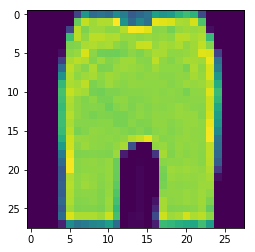

In [4]:
image_index = 8921 # Can be any number between 0 and 59999
print(y_train_input[image_index], labels[y_train_input[image_index]])
plt.imshow(x_train_input[image_index])


The *matplotlib.pyplot as plt* can be used to show the images in the dataset. 
We also print the label of that image, which is a number between 1 and 9. With the mapping we can convert this number to the name that this number represents.


In [5]:
print(x_train_input.shape, y_train_input.shape, x_test_input.shape, y_test_input.shape)
print(x_train_input[8921][26][22])

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
229


In machine learning it is really important to understand and have a feeling for the shapes of the data. 
 We need to make sure the input data matches the first layer of the model and the output matches the output of the final layer of the model. Above we printed the shape of each data. For *x_train_input* this is (60000, 28, 28). This means we have a three-dimensional array that contains 60.000 * 28 * 28 data points (~47 million). The 60.000 are the number of images we have in the dataset. The 28, 28 are the height and the width of the images in pixels. Each datapoint is a number between 0 and 255, which represents the darkness of that pixel. 

The *y_train_input* is (60000,) which is a array with 60.000 datapoints. Each datapoint represent the label of the image and is a number between 0 and 9. 

*x_test_input* and *y_test_input* are similar to *x_train_input* and *y_train_input*, only with a different amount of images. 

In [38]:
image_size = x_train_input.shape[1] * x_train_input.shape[2] # shape was 60000, 28, 28. So the images are 28 by 28
# x_train.shape[0] is the amount of images. 
x_train = x_train_input.reshape(x_train_input.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32') # convert the values to values that can be divided in python
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

x_test = x_test_input.reshape(x_test_input.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32') # convert the values to values that can be divided in python
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

print(x_train.shape)

(60000, 784)


The neural network that we are creating is not expecting two dimensional data. (*There are layers that accept two dimensional arrays, which we will see in the next part*) So we have translate the input data into a format the neural network can handle. We can use the reshape function to change the format from a (60000, 28, 28) to a  (60000, 784) array. Furthermore we normalize the data between 0.0 and 1.0, by dividing by 255. 

In [7]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train_input, num_classes)
y_test = keras.utils.to_categorical(y_test_input, num_classes)
print(y_train.shape, y_test.shape)

index_y = 3
print(y_train[index_y])
print(y_train_input[index_y])


(60000, 10) (10000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3


We also have to change the format of the labels, since the numerical values of the labels have no relation with each other. To do this, we can use the keras utils to map each label to a single column. Each Shirt (0), has 1 in the first column. All other labels have 0 in that column. This means the model will output a single value for each item. 

![wow](https://github.com/Barttje/summercourse-ml/blob/master/one_hot_encoding.png?raw=true)



#Creating and training the neural network

In [8]:
neurons_in_hidden_layer=512
model = Sequential()
model.add(Dense(units=neurons_in_hidden_layer, activation='relu', input_shape=(image_size,))) # Input layer - > Hidden Layer
#model.add(Dropout(0.5)) # see section overfitting
model.add(Dense(units=num_classes, activation='softmax')) # Hidden Layer -> Output layer
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

print("input: ", model.input)
print("output: ", model.output)

input:  Tensor("dense_1_input:0", shape=(?, 784), dtype=float32)
output:  Tensor("dense_2/Softmax:0", shape=(?, 10), dtype=float32)


So here we have defined three layers in the model. Although it looks like we only added two layers to the model, we are adding connectinons between layers to our model. So in our model, the first dense layer is the connection between the input layer and the hidden layer. The second dense layer is the connection between the hidden layer and the output layer.  ![alt text](https://raw.githubusercontent.com/Barttje/summercourse-ml/master/Neural_network_fashion_1.png)

So the first dense layer has as input the image size, since this has to match with *x_training*. The units are the outputs of a layer, which we set to 512 for the first layer. This also means that the second dense layer has as input the 512 values, which we do not have to configure. As output ( units) for this layers we define the number of classes. This has to match the shape of the *y_training*.

To see if we did this correctly the following will print the input and the output the model expects. 
```
print("input: ", model.input)
print("output: ", model.input)

```

In our case it will print the following: 

*input:  Tensor("dense_19_input:0", shape=(?, 784), dtype=float32)*

*output:  Tensor("dense_20/Softmax:0", shape=(?, 10), dtype=float32)*

The input for the model is shape *(?, 784)*, which means a two dimensional array where the second dimension has 784 values. It does not matter how many images we have, but they have to be of size 784. Which has to match the shape of *X_training* and *X_test*

The output of the model is shape *(?,10)*, which means we get 10 values for each image we put in the model. A prediction for each possible item, which has to match the shape of our *y_training* and *y_test*.

The other parameters for the models are the activation function, which is usually *relu*, but when you are dealing with a classification problem the *softmax* activation function is a good idea for the last layer. More information about the possible activation functions in Keras can be found [here](https://keras.io/activations/). More information about the theory behind activation functions can be found [here](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0). 

We can also configure the optimizer, which is the algortihm that updates the weights during training. *adam* is the most popular one, so we use that one. More information about the possible optimizers in Keras can be found [here](https://keras.io/optimizers/) and more information about the theory behind optizimers can be found [here](https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f). 

Finally we configure the loss function during training. The loss functions measures how well the model is working on the data set. One of the most popular ones is the mean squared error. However for classification problems that predict 0 or 1, the *categorical_crossentropy* works better. All the possible  loss functions in Keras can be found [here](https://keras.io/losses/) and [this](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/) is a great article explaining more about which one to choose.

In [9]:
epochs = 15
history = model.fit(x_train, y_train, validation_split=0.8, epochs=epochs)

Train on 11999 samples, validate on 48001 samples
Epoch 1/15
11999/11999 [==============================] - 6s 490us/step - loss: 0.6226 - acc: 0.7854 - val_loss: 0.5264 - val_acc: 0.8140
Epoch 2/15
11999/11999 [==============================] - 5s 417us/step - loss: 0.4572 - acc: 0.8361 - val_loss: 0.4434 - val_acc: 0.8437
Epoch 3/15
11999/11999 [==============================] - 5s 425us/step - loss: 0.3973 - acc: 0.8576 - val_loss: 0.4536 - val_acc: 0.8364
Epoch 4/15
11999/11999 [==============================] - 5s 416us/step - loss: 0.3590 - acc: 0.8678 - val_loss: 0.4128 - val_acc: 0.8577
Epoch 5/15
11999/11999 [==============================] - 5s 417us/step - loss: 0.3276 - acc: 0.8783 - val_loss: 0.4156 - val_acc: 0.8546
Epoch 6/15
11999/11999 [==============================] - 5s 420us/step - loss: 0.3126 - acc: 0.8862 - val_loss: 0.3883 - val_acc: 0.8630
Epoch 7/15
11999/11999 [==============================] - 5s 424us/step - loss: 0.2919 - acc: 0.8944 - val_loss: 0.3947 - 

Here we are going to actually start the training of the model. The most important is the *x_train* and *y_train*. They have to match the input and the output of the model, otherwise we cannot start training. Another import value is the number of epochs, which is the amount of times the whole data set is send through the neural network. Another paramater we will use is the validation split. This means the training will not use all the data, but split it. With *0.2*, we will use *12000/60000* images as validation images. Those will not be used for training the neural network, but after each epoch, the model will also compute the loss and the accuracy for the validation data set. This can be used to detect overfitting and underfitting as we we will explain later. 



In [10]:
loss, accuracy  = model.evaluate(x_test, y_test)
print(loss, accuracy)

10000/10000 [==============================] - 0s 47us/step
0.47410555620193484 0.8493


Time to evaluate the model! With model.evaluate(), we can evaluate the model on the test data we kept apart. It is very important that the *x_test* matches the input of the model and *y_test* matches the output of the model. (*We keep repeating this, but is a mistake made very often when starting with Machine Learning)* This will print two scores the accuracy and the loss. Accuracy is the right predictions divided by the number of predictions. The loss is the value computed by the loss function, which hugely depends on the loss function. To get an impression of your scores, it is always good to compare the loss and the accuracy with the loss and the accuracy of the model. 

#Applying the model

[[2.3878768e-01 2.5759279e-03 8.2438142e-04 4.0980607e-01 4.0266977e-04
  2.1369309e-05 3.4755906e-01 3.4685942e-07 1.4250134e-05 8.2871366e-06]]
3 Dress
0 T-Shirt


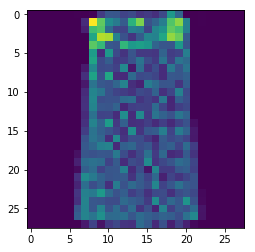

In [11]:
index = 6293
image_flat = np.array([x_test[index]]) # we have to make an array of the image as the model expects (?,784) as input.
pred = model.predict(image_flat) 
print(pred)
print(pred.argmax(), labels[pred.argmax()]) #argmax prints the index of the highest value
print(y_test[index].argmax(), labels[y_test[index].argmax()] )
plt.imshow(x_test_input[index])



With model.predict(image), we can predict the scores for a single image. Remember that we have to convert the image to an array, since the model is expecting *(?,784)* as input.

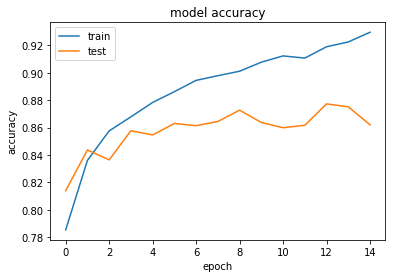

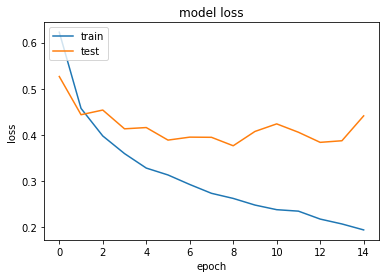

In [12]:
# list all data in history
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Overfitting and Underfitting
Overfitting occurs when the model also learns from the noise and inaccurate data. Underfitting occurs when the model does not learn anything at all. With overfitting you learn to much from the data and with underfitting you learn not enough from the data. ![Overfitting,underfitting and balanced](https://github.com/Barttje/summercourse-ml/blob/master/Overfitting_underfitting.png?raw=true)
### Detecting overfitting/underfitting
Underfitting occurs when the loss is very high and the accuray is very low. Overfitting occurs when there is a gap between the accuracy and loss of the training data set and of the test data set. It occurs more often after multiple epochs, when the model is become more and more complex and fitted to the training data instead of a generalized model for the actual problem. 
![alt text](https://raw.githubusercontent.com/Barttje/summercourse-ml/master/detect_overfitting.png)
#### Handling overfitting
Early Stopping: Instead of going for more runs, let the training stop at the number of runs when the validation accuracy is starting to decrease and the validation loss is starting to increase. 

Drop out layers: Instead of using all the output values from the dense layers, the drop out layers remove outputs and only forward a part of the outputs to the next layer. This decreases the chances that the model is going to overfit. 
#### Handling underfitting
Try to get more training data. More and different kind of training data gives the neural network more data to learn from.

Try more epochs. If  the accuracy is increasing and loss is decreasing, the neural network might not have enough time to learn from the data yet. 

Try to increase the complexity of the model by adding more layers and try to play around with increasing amount of neurons in the layers and different activation and loss functions.

In [0]:
neurons_in_hidden_layer=512
model = Sequential()
model.add(Dense(units=neurons_in_hidden_layer, activation='relu', input_shape=(image_size,))) # Input layer - > Hidden Layer
model.add(Dropout(0.5)) # Add dropout layer to reduce overfitting
model.add(Dense(units=num_classes, activation='softmax')) # Hidden Layer -> Output layer
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

# Convolutional Neural Network

In [0]:
from keras.layers import Conv2D, Flatten

def reshape_cnn(input):
  output = input.reshape(input.shape[0],input.shape[1],input.shape[2],1)
  output = output.astype('float32')
  output /= 255
  return output

x_train_cnn = reshape_cnn(x_train_input)
x_test_cnn = reshape_cnn(x_test_input)

In [15]:
cnn_model= Sequential()
cnn_model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=num_classes, activation='softmax')) # Hidden Layer -> Output layer
cnn_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

print(cnn_model.input)
print(cnn_model.output)
cnn_model.summary()

Tensor("conv2d_1_input:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("dense_5/Softmax:0", shape=(?, 10), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                432650    
Total params: 433,290
Trainable params: 433,290
Non-trainable params: 0
_________________________________________________________________


In [16]:
cnn_model.fit(x_train_cnn, y_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 44s 741us/step - loss: 0.3899 - acc: 0.8637
Epoch 2/2
60000/60000 [==============================] - 44s 736us/step - loss: 0.2748 - acc: 0.9019


## Kaggle

[Kaggle](https://www.kaggle.com) is an online community of data scientists and machine learners where you can find datasets and with challenges, solutions and discussions. It's a great resource to improve your skills and share knowledge.

We've prepared a dataset already for you to make it easier to download into this Notebook. The dataset we'll be using is called [Dogs vs. Cats](https://www.kaggle.com/c/dogs-vs-cats).

In [0]:
import sys
import os
import random
import logging
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import Model, applications
from keras.models import Sequential

In [18]:
zipFile = './cats-vs-dogs.zip'

if 'pydrive' not in sys.modules:
  # Install the PyDrive wrapper & import libraries.
  # This only needs to be done once per notebook.
  !pip install -U -q PyDrive
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive

if not os.path.isfile(zipFile):
  from google.colab import auth
  from oauth2client.client import GoogleCredentials
  logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  driveFile = drive.CreateFile({'id': '1NUgVlKA1Qie2ZjNJO51sh488uemX6EOO'})
  print("downloading file")
  driveFile.GetContentFile(zipFile)
  
print("unzipping")
!unzip -qu {zipFile}
print("files are ready")

unzipping
files are ready


We have to split the dataset into training and test sets. While doding this it's very importend to have balanced sets, this means that for every outcome there are the same amount of datapoints in your set. For example if we have 100 dogs in our set then we would also want to have 100 cats in our set.

In [36]:
all_images = os.listdir("./train/")
cats = [f for f in all_images if f.startswith("cat")];
dogs = [f for f in all_images if f.startswith("dog")];


# If there is an inbalance in the dataset we want to use the smallest set size to balance out the dataset
smallest_set_size = min(len(cats),len(dogs))

# Split the dataset into 80% training and 20% test data. Using train_test_split from sklearn it will choose those sets randomly
cat_train, cat_test, dog_train, dog_test = train_test_split(cats[:smallest_set_size], dogs[:smallest_set_size], test_size=0.20);

print("There are {} cats and {} dogs in our dataset".format(len(cats), len(dogs)))
print("There are {} cats and {} dogs in our trainigset".format(len(cat_train), len(dog_train)))
print("There are {} cats and {} dogs in our testset".format(len(cat_test), len(dog_test)))


# Combine the train and test sets
train = pd.DataFrame(cat_train + dog_train, columns=["filename"])
test = pd.DataFrame(cat_test + dog_test, columns=["filename"])

# Add labels to train on to the dataframe
train.loc[(train["filename"].str.startswith("cat")), "class"] = "cat"
train.loc[(train["filename"].str.startswith("dog")), "class"] = "dog"
test.loc[(test["filename"].str.startswith("cat")), "class"] = "cat"
test.loc[(test["filename"].str.startswith("dog")), "class"] = "dog"

# Using sample(frax=1) we will shuffle the set
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)

There are 12500 cats and 12500 dogs in our dataset
There are 10000 cats and 10000 dogs in our trainigset
There are 2500 cats and 2500 dogs in our testset


We can increase the size of our dataset by generating slightly different variations of the same images. We can use the ImageDataGenerator to automatically create those images. We will zoom and shear and flip the image randomly.

In [26]:
target_width = 200
target_height = 200

# The augmentation configuration we will use for training
train_datagen = image.ImageDataGenerator(
    width_shift_range=0,
    height_shift_range=0,
        rescale=1./255,      # Normalize the pixel value to be between 0 and 1
        shear_range=0.4,
        zoom_range=0.2,
        horizontal_flip=True)

# The test data should only be normalized but not transformed
test_datagen = image.ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_dataframe(
    train, 
    directory="./train/",
    target_size=(target_width, target_height),  # All images will be resized to 200x200
    batch_size=16,
    class_mode="binary",
    interpolation="box"
      )
test_generator = test_datagen.flow_from_dataframe(
    test, 
    directory="./train/",
    target_size=(target_width, target_height),  # All images will be resized to 200x200
    batch_size=16,
    class_mode="binary")

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


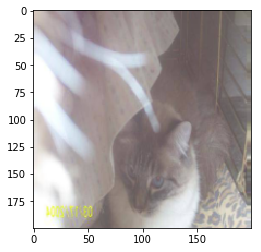

In [28]:
plt.imshow(train_generator[random.randint(0,1250)][0][0])

Lets try to apply the model we've used on the Zalando dataset

In [29]:
cnn_model= Sequential()
cnn_model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(target_width,target_height,3)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=1, activation='sigmoid')) # Hidden Layer -> Output layer
cnn_model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

print(cnn_model.input)
print(cnn_model.output)
cnn_model.summary()

Tensor("conv2d_2_input:0", shape=(?, 200, 200, 3), dtype=float32)
Tensor("dense_6/Sigmoid:0", shape=(?, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 198, 198, 64)      1792      
_________________________________________________________________
flatten_2 (Flatten)          (None, 2509056)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2509057   
Total params: 2,510,849
Trainable params: 2,510,849
Non-trainable params: 0
_________________________________________________________________


In [30]:
cnn_model.fit_generator(
        train_generator,
        steps_per_epoch=40,
        epochs=8,
        validation_data=test_generator,
        validation_steps=20)

Epoch 1/8
40/40 [==============================] - 29s 737ms/step - loss: 8.1636 - acc: 0.4703 - val_loss: 8.1705 - val_acc: 0.4875
Epoch 2/8
17/40 [===========>..................] - ETA: 13s - loss: 7.6195 - acc: 0.5221

KeyboardInterrupt: ignored

We see that the accouray will start around 0.5 and will not move far away from this. This is because we would need a lot a learning before the convolutional layer is trained.

Another issue is that we have larger images. A single convolutional layer will just not do the job for this problem. To speed up te process of training the convolutional layer we can use a technique called transfer learning. This is a pre trained model where we will split the convolutional part and reuse it for our problem.

###VGG16

VGG16 is a pretrained model. We can leverage all the work and training time put into this model. We do this by downloading VGG16 without the "top" and write out own. By doing this we can quickly create a network for own own data.

In [31]:
VGGmodel = applications.VGG16(weights='imagenet', include_top=False, input_shape =(target_width, target_height, 3))

VGGmodel.summary()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool

In [0]:
#Flattering the output from VGG16 convolutional layers
top_model = Flatten()(VGGmodel.output)

#Adding our own top layers
top_model = Dense(256, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)
top_model = Dense(256, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)

#Adding the output layer
top_model = Dense(1, activation='sigmoid')(top_model)

In [0]:
#Finishing the model
full_model = Model([VGGmodel.input], [top_model])

# Set the first 16 layers to non-trainable (weights will not be updated)
for layer in full_model.layers[:16]:
    layer.trainable = False

# Compiling the model
full_model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Let's train the model!

In [35]:
full_model.fit_generator(
        train_generator,
        steps_per_epoch=40,
        epochs=8,
        validation_data=test_generator,
        validation_steps=20)

Epoch 1/8
 5/40 [==>...........................] - ETA: 4:42 - loss: 0.9579 - acc: 0.5250

KeyboardInterrupt: ignored